In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from lib.loads import parse_loads, convert_offline_to_online_input
from lib.model import build_model, FACEBOOK_2009_0, FACEBOOK_2009_1, ENERGY_MODEL_WIERMAN
from lib.utils import summarize_distribution, plot_cdf, plot

In [4]:
# import logging

# FORMAT = '%(levelname)s %(name)s %(asctime)-15s %(filename)s:%(lineno)d %(message)s'
# logging.basicConfig(format=FORMAT)
# logging.getLogger().setLevel(logging.INFO)

In [5]:
TIME_SLOT_LENGTH = 10 * 60
NORMALIZED_SWITCHING_COST = 1
REVENUE_LOSS = 0.1

In [6]:
TRACE = FACEBOOK_2009_1

# Model

In [7]:
model = build_model(
  TRACE,
  ENERGY_MODEL_WIERMAN,
  TIME_SLOT_LENGTH,
  NORMALIZED_SWITCHING_COST,
  REVENUE_LOSS,
)

# Inputs

In [8]:
offline_input = parse_loads(TRACE)
perfect_knowledge_online_input = convert_offline_to_online_input(offline_input)

# Execute

## Offline

In [8]:
from lib.offline import evaluate_1d

opt, iopt, runtime_opt, runtime_iopt = evaluate_1d(model, offline_input)

INFO soco.bindings.data_center.offline 2021-07-29 16:21:20,692 offline.rs:83 Graph Search
INFO soco.streaming.offline 2021-07-29 16:21:20,695 offline.rs:40 Generated a problem instance: SimplifiedSmoothedConvexOptimization { d: 1, t_end: 144, bounds: [600], switching_cost: [6.0] }
INFO soco.streaming.offline 2021-07-29 16:21:20,696 offline.rs:42 Simulating until time slot 144.


In [ ]:
from lib.offline import evaluate_static

opts, iopts, runtime_opts, runtime_iopts = evaluate_static(model, offline_input)

NameError: name 'model' is not defined

### Fractional vs Integral

In [14]:
opt_vs_iopt = iopt / opt
opts_vs_iopts = iopts / opts
opt_vs_iopt, opts_vs_iopts

(1.0004740848231972, 1.8626864521509363)

### Opt vs OptS

In [15]:
opt_vs_opts = opts / opt
iopt_vs_iopts = iopts / iopt
opt_vs_opts, iopt_vs_iopts

(1.0895373040625305, 2.028504692102021)

### Runtimes

In [16]:
runtime_opt, runtime_iopt, runtime_opts, runtime_iopts

(1400439, 135685, 1720921, 44000)

### Approximation algorithm

In [9]:
iopt = 3164486.16777545

In [10]:
gammas = np.logspace(
  0.2, 3, 8, base=2
)
gammas

array([1.14869835, 1.51571657, 2.        , 2.63901582, 3.48220225,
       4.59479342, 6.06286627, 8.        ])

In [1]:
from lib.offline import evaluate_approx_graph_search

x, y, approx_opt_runtimes = evaluate_approx_graph_search(model, offline_input, gammas)

NameError: name 'model' is not defined

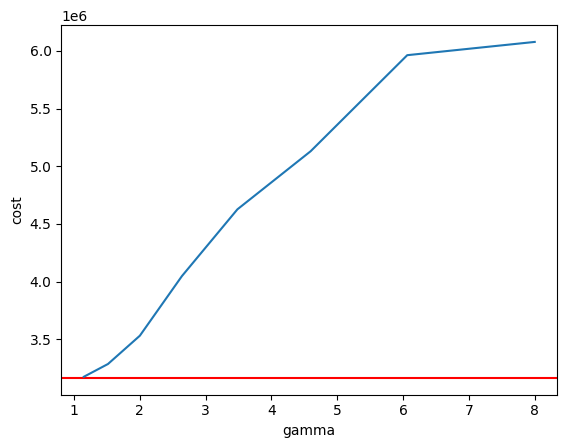

In [12]:
plt.axhline(y=iopt, color='r', linestyle='-')
plot(x, y, 'gamma', 'cost', 'approx_graph_search')
plt.show()

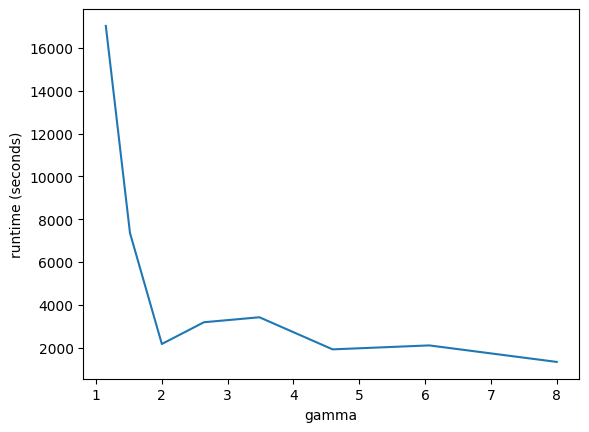

In [21]:
plot(x, approx_opt_runtimes, 'gamma', 'runtime (milliseconds)', 'approx_graph_search_runtime')
plt.show()

## Online

In [9]:
from lib.online import evaluate_fractional_lazy_capacity_provisioning

initial_alg, alg, initial_ialg, ialg, energy_cost, revenue_loss, switching_cost, initial_runtime, runtimes = evaluate_fractional_lazy_capacity_provisioning(model, [], perfect_knowledge_online_input)

INFO soco.streaming.online 2021-07-29 16:42:32,782 online.rs:114 Generated a problem instance: Online { p: SimplifiedSmoothedConvexOptimization { d: 1, t_end: 0, bounds: [600.0], switching_cost: [6.0] }, w: 0 }
INFO soco.streaming.online 2021-07-29 16:42:32,783 online.rs:116 Simulating until time slot 0.
INFO soco.streaming.online 2021-07-29 16:42:32,786 online.rs:162 [server] Running on 127.0.0.1:3449.
  0%|          | 0/144 [00:00<?, ?it/s]INFO soco.streaming.online 2021-07-29 16:42:32,795 online.rs:263 [client] Connected to 127.0.0.1:3449.
INFO soco.streaming.online 2021-07-29 16:42:32,795 online.rs:169 [server] Connection established!
INFO soco.streaming.online 2021-07-29 16:42:32,798 online.rs:268 [client] Sent: DataCenterOnlineInput { loads: [PredictedLoadProfile([[34.0]]), PredictedLoadProfile([[31.0]]), PredictedLoadProfile([[49.0]]), PredictedLoadProfile([[45.0]]), PredictedLoadProfile([[27.0]]), PredictedLoadProfile([[45.0]]), PredictedLoadProfile([[89.0]]), PredictedLoadProf

In [9]:
alg, ialg, energy_cost, revenue_loss, switching_cost

(243794225.2982641,
 244106113.06393963,
 205271400.0,
 38448715.06393963,
 385998.0)

## Evaluation

### Competitive Ratio

In [21]:
cr = alg / opt
icr = ialg / iopt
cr, icr

(77.07722248206338, 77.13925740921768)

### Competitive Difference

In [22]:
cd = alg - opt
icd = ialg - iopt
cd, icd

(240631238.60905376, 240941626.89616418)

### Regret

In [23]:
regret = alg - opts
iregret = ialg - iopts
regret, iregret

(240348033.31218106, 237686938.02451518)

### Cost Change

Regret relative to overall cost.

In [24]:
rel_regret = regret / opts
rel_iregret = iregret / iopts
rel_regret, rel_iregret

(69.74307799711626, 37.027645540855396)

Competitive difference relative to overall cost.

In [25]:
rel_cd = cd / opt
rel_icd = icd / iopt
rel_cd, rel_icd

(76.07722248206338, 76.13925740921768)

### Fractional vs Integral

In [26]:
alg_vs_ialg = ialg / alg
alg_vs_ialg

1.0012793076240865

### Runtime

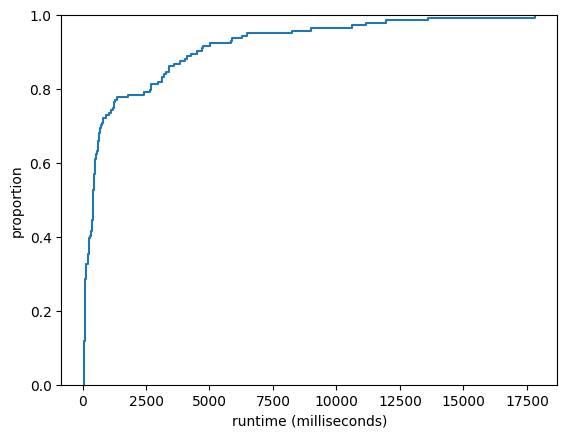

DistributionSummary(mean=1527.861111111111, median=411.5, modes=array([104]), std=2817.0858923991514, mad=320.0, min_=51, p25=107.75, p75=1197.5, max_=17808)

In [11]:
runtimes_np = np.array(runtimes)
plot_cdf(runtimes_np, 'runtime (milliseconds)', 'online_runtime')
plt.show()
summarize_distribution(runtimes_np)

### Model

Proportion of energy cost to delay cost

In [28]:
ec_vs_rl = energy_cost / revenue_loss if revenue_loss > 0 else np.Inf
hc_vs_sc = (energy_cost + revenue_loss) / switching_cost
ec_vs_rl, hc_vs_sc

(5.338836412572872, 631.4025333393946)